<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/serie_selic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

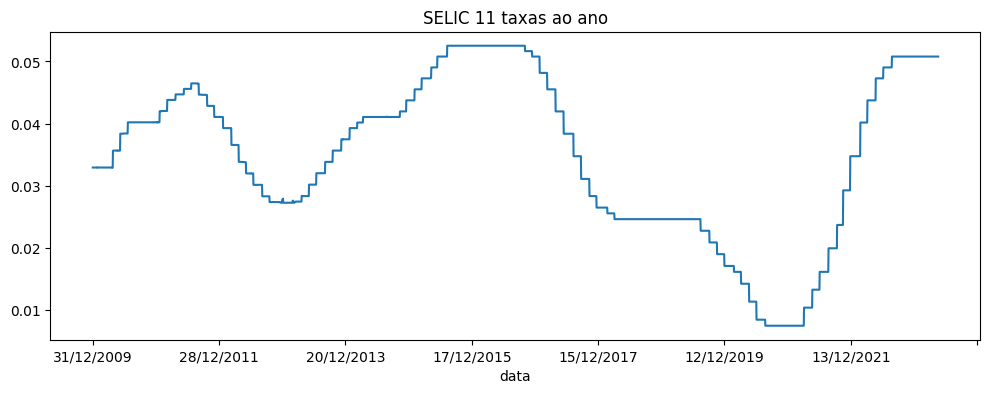

In [10]:
import pandas as pd
import matplotlib.pyplot as plot

def CarregaSELIC(data_inicial,data_final,codigo=4189):
    # carrega um intervalo de taxas SELIC no período data inicial até final
    url_bcb = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=csv&dataInicial={data_inicial}&dataFinal={data_final}"
    serie_SELIC = pd.read_csv(url_bcb, sep=";")
    return serie_SELIC

## 4189  Taxa de juros - Selic acumulada no mês anualizada base 252	 % aa
## 4390	 Taxa de juros - Selic acumulada no mês	% a.m.
## 11	   Taxa de juros - Selic	% a.d.
## 432	 Taxa de juros - Meta Selic definida pelo Copom	% a.a.
## 1178	 Taxa de juros - Selic anualizada base 252	% a.a.

codigo=11


# aqui comeca o codigo principal
# le os dados do BCB dadosabertos
serie = CarregaSELIC("01/01/2010","28/04/2023",codigo)

# prepara e faz grafico das taxas lidas
serie1 = serie.replace({',':'.'}, regex=True)
serie1['valor'] = serie1['valor'].astype(float)
# gera grafico
serie1.plot.line(x="data",y="valor",title= f"SELIC {codigo} taxas ao ano",legend=False,figsize=(12,4))

plot.show(block=True)
